## Project


In [1]:
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import wordcloud
import nltk

**Read data files from two folders(News Articles, Summaries) and put them into table**

- First folders contain articles within each category
- Second folders contain summary of articles within each category

- We decided to make two tables, with the data from two folders
- Later, those two tables combined into single table


In [2]:
article_path = 'BBC News Summary/News Articles'
category = ['business', 'entertainment', 'politics', 'sport', 'tech']

data = []

for category in category:
    category_path = os.path.join(article_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            data.append({'Article': content, 'Category': category})

df = pd.DataFrame(data)

In [3]:
df

,Article,Category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [4]:
summary_path = 'BBC News Summary/Summaries'
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']

data = []

for category in categories:
    category_path = os.path.join(summary_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            data.append({'Summary': content})

df1 = pd.DataFrame(data)

In [5]:
df1

,Summary
0,TimeWarner said fourth quarter sales rose 2% t...
1,The dollar has hit its highest level against t...
2,Yukos' owner Menatep Group says it will ask Ro...
3,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod has reduced the debt it took on to fund...
...,...
2220,BT is introducing two initiatives to help beat...
2221,A third of them read unsolicited junk e-mail a...
2222,This goes to the heart of the European project...
2223,Amit Yoran was director of the National Cyber ...


**Combine the data into one table**


In [6]:
df = pd.concat([df, df1], axis=1)
df = df[['Article', 'Category', 'Summary']]
df

,Article,Category,Summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,tech,Amit Yoran was director of the National Cyber ...


In [7]:
df['Category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

**Data Preprocessing**

- We decided to strip the first sentence before first '\n', and later that sentence become title of the article


In [8]:
article = []
titles = []
for x in df['Article']:
    title = x.split('\n\n')[0].strip()
    titles.append(title)
    article.append(x.replace(title, '').strip())
df['Title'] = titles
df['Article'] = article

In [9]:
df = df[['Title', 'Article', 'Category', 'Summary']]

In [10]:
df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help beat...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ig...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer networks are s...,tech,Amit Yoran was director of the National Cyber ...


In [11]:
df['Article'] = df['Article'].str.replace('\n', ' ')

**Data Cleansing**

- Noise removal and normalize text

- Stopwords

- Lemmatizing

\*Notes : tokenizer is performed in our selected model


Remove noise in dataset and normalize text (lowercase text)


In [12]:
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # remove URL
    text = re.sub(r'\S+@\S+', '', text) # remove emails
    text = re.sub(r'<.*?>', '', text) # remove HTML code
    text = text.strip() # remove start/end space
    return text

# Apply the clean_text function to the 'Title' and 'Article' columns
df['Title'] = df['Title'].apply(clean_text)
df['Article'] = df['Article'].apply(clean_text)

df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help beat...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ig...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer networks are s...,tech,Amit Yoran was director of the National Cyber ...


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['Article'] = df['Article'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wsusa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar ha hit it highest level against the...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owner of embattled Russian oil giant Yukos...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways ha blamed high fuel price for ...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drink and food firm Allied Domecq...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiative to help beat ...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer user across the world continue to ign...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer network are sa...,tech,Amit Yoran was director of the National Cyber ...


**Exploratorial Data Analysis**


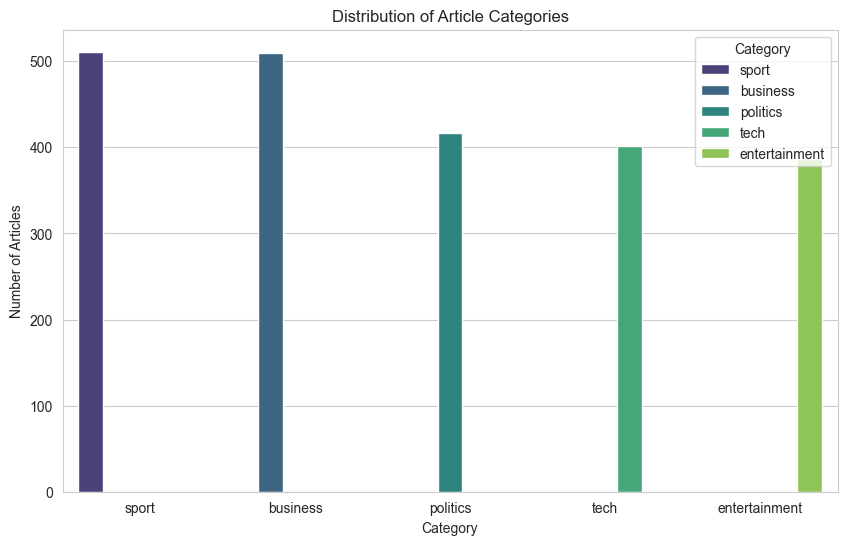

In [15]:
sns.set_style("whitegrid")

category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', hue=category_counts.index)
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

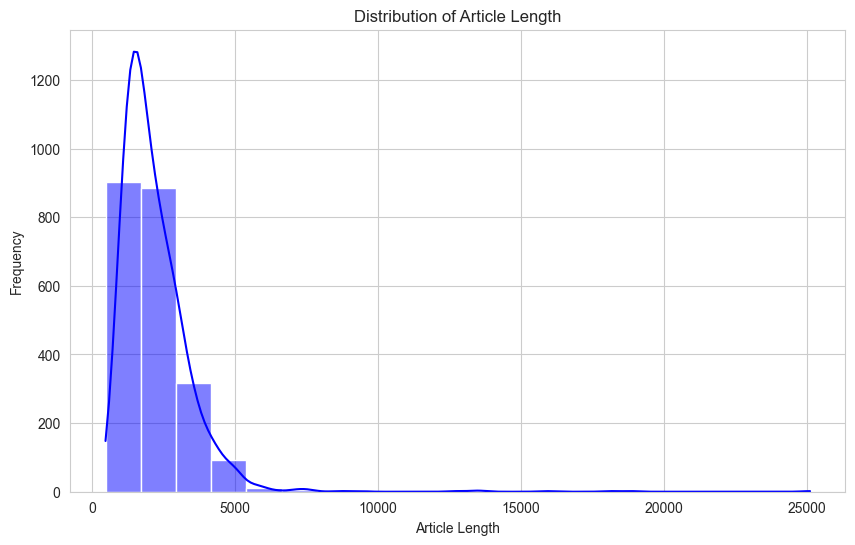

In [16]:
df['Article_Length'] = df['Article'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Article_Length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Article Length')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

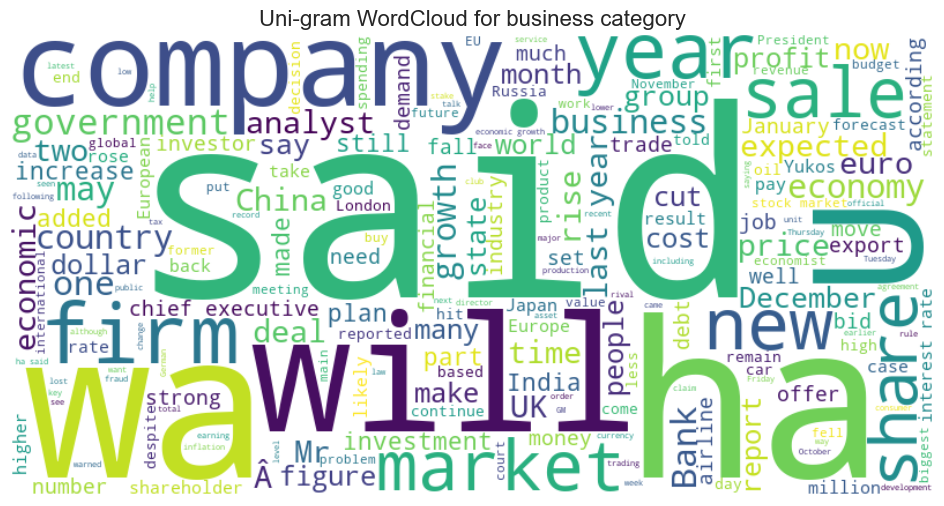

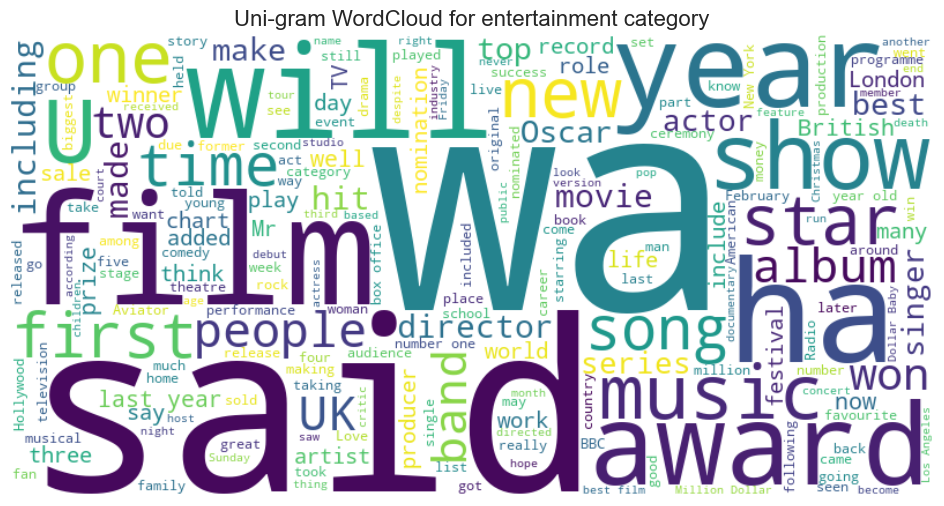

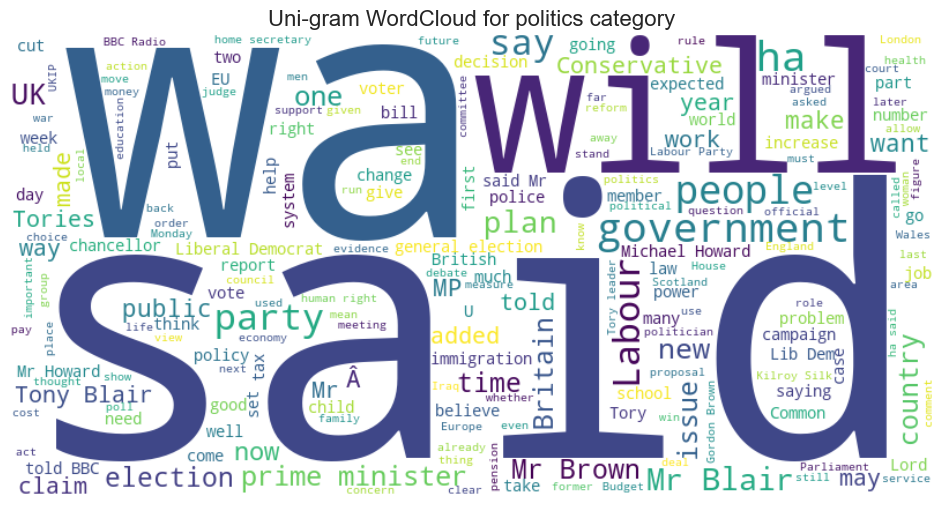

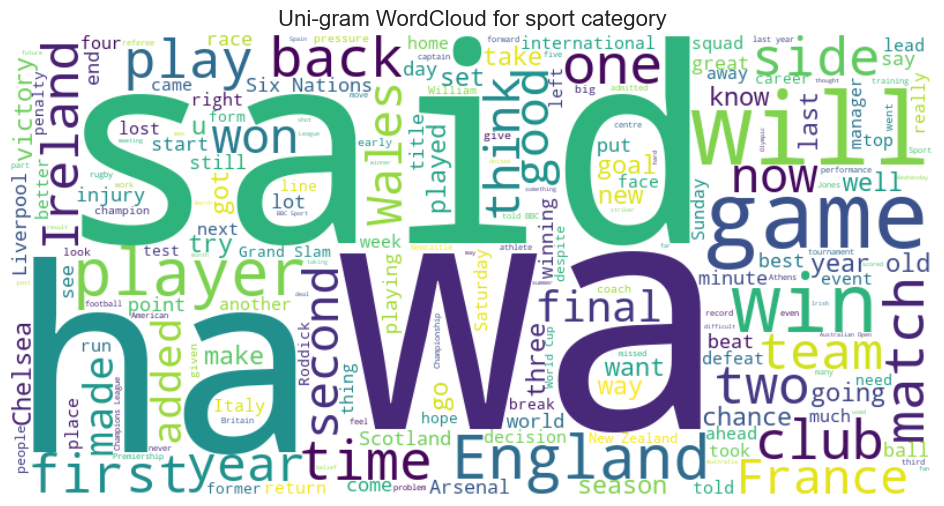

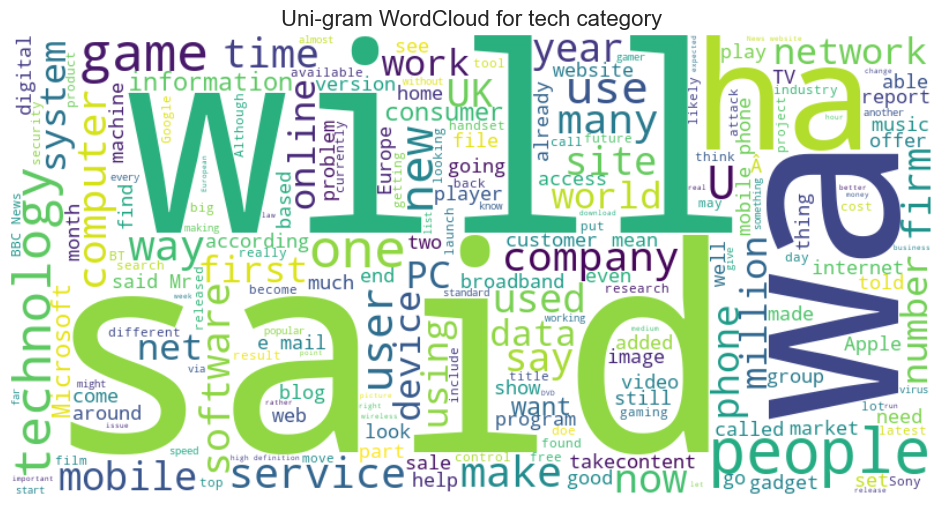

In [17]:
from wordcloud import WordCloud
for category in df['Category'].unique():
    text = ' '.join(df[df['Category'] == category]['Article'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Uni-gram WordCloud for {category} category', fontsize=16)
    plt.axis('off')
    plt.show()

WordCloud visualizations for each category give us some sightings. The most frequent word appeared is "said" word. Maybe because the data source we took was newspaper text, and there were lots of opinions expressed by other people (source person/expert), and quoted by the author. So, the word "said" can become the most frequent word, because the author quotes sentences from source person/expert. When quoting source person/expert words, the author definitely uses the word "said" as an explanation, that the sentence was said by someone (source person/expert)


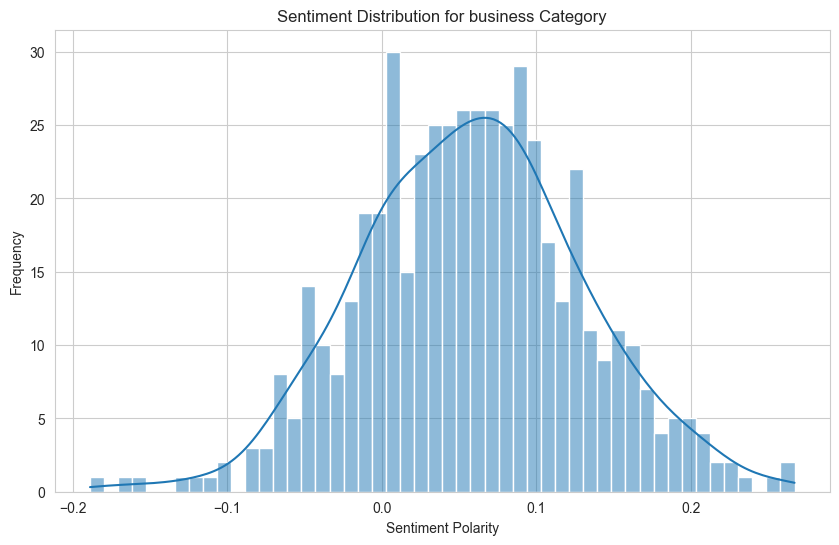

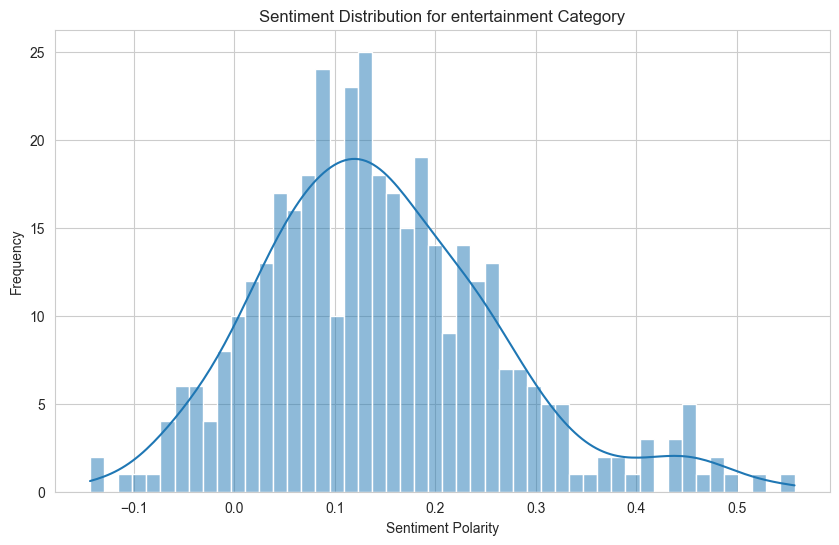

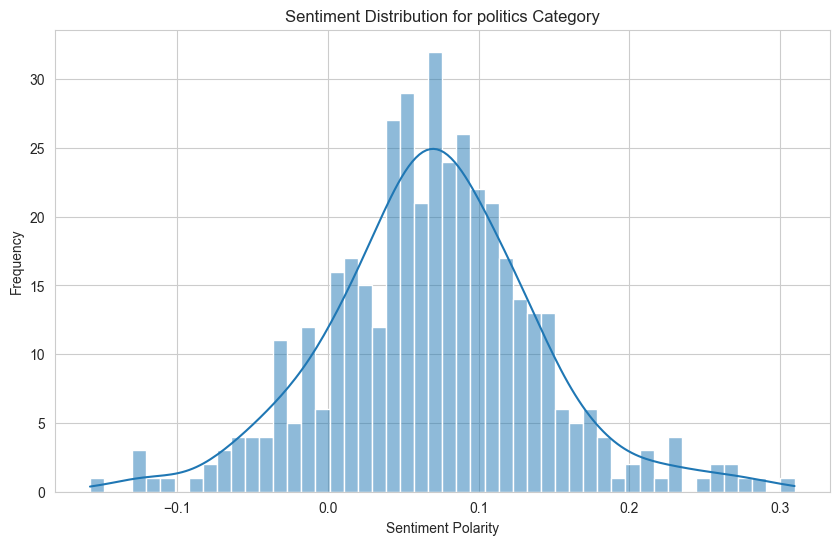

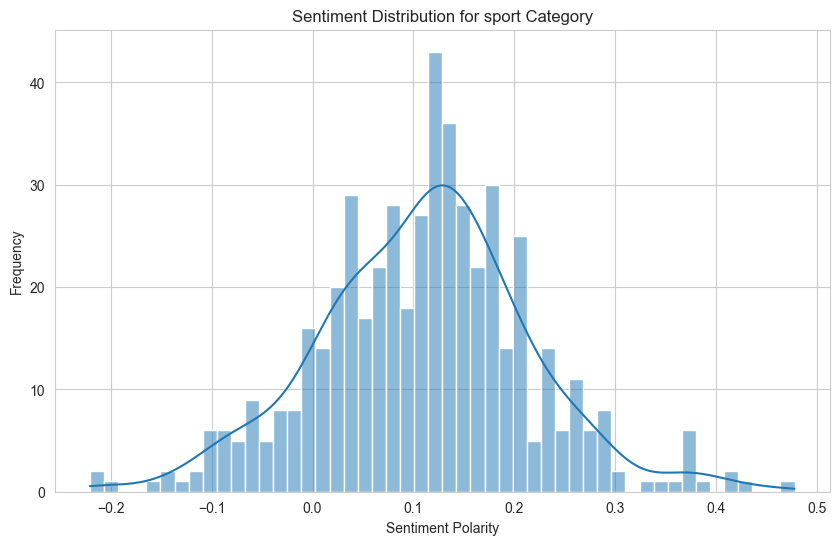

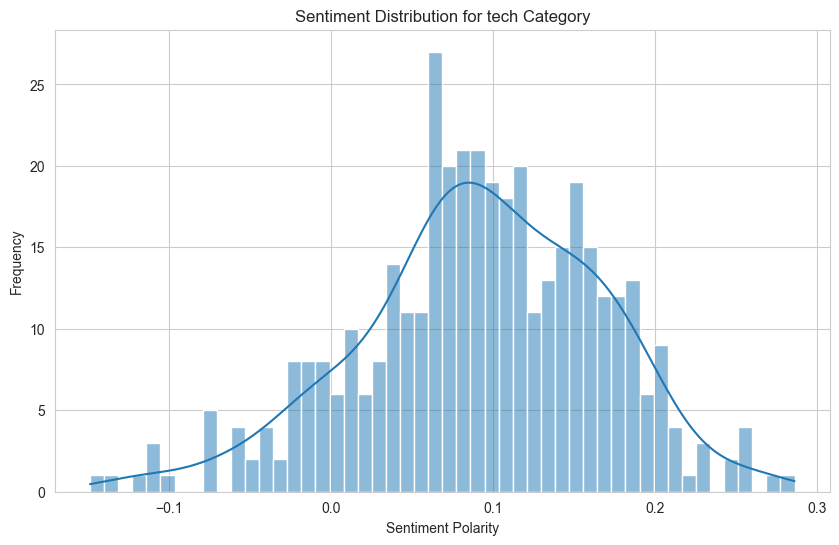

In [18]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['Sentiment'] = df['Article'].apply(analyze_sentiment)

for category in df['Category'].unique():
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Category'] == category]['Sentiment'], bins=50, kde=True)
    plt.title(f'Sentiment Distribution for {category} Category')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

Sentiment analysis use to determined polarity of a given text, which indicate whether the sentiment of text is positive, negative, or neutral using polarity score:

Positive Sentiment: Polarity score > 0
Negative Sentiment: Polarity score < 0
Neutral Sentiment: Polarity score = 0

In this case, we use TextBlob library that provides a polarity score ranging from -1 (most negative) to 1 (most positive)


From sentiment analysis in each category, we found the polarity usually distributes arond 0-0.1. Which indicates that most of the text in each category usually has neutral sentiment, only few/none had around positive/negative sentiment


In [19]:
df

,Title,Article,Category,Summary,Article_Length,Sentiment
0,Ad sales boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...,2483,0.131389
1,Dollar gains on Greenspan speech,The dollar ha hit it highest level against the...,business,The dollar has hit its highest level against t...,2185,0.075102
2,Yukos unit buyer faces loan claim,The owner of embattled Russian oil giant Yukos...,business,Yukos' owner Menatep Group says it will ask Ro...,1492,-0.003889
3,High fuel prices hit BA's profits,British Airways ha blamed high fuel price for ...,business,"Rod Eddington, BA's chief executive, said the ...",2338,0.154017
4,Pernod takeover talk lifts Domecq,Shares in UK drink and food firm Allied Domecq...,business,Pernod has reduced the debt it took on to fund...,1507,0.063194
...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiative to help beat ...,tech,BT is introducing two initiatives to help beat...,2442,0.115572
2221,Spam e-mails tempt net shoppers,Computer user across the world continue to ign...,tech,A third of them read unsolicited junk e-mail a...,2217,0.191071
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...,6173,0.083299
2223,US cyber security chief resigns,The man making sure US computer network are sa...,tech,Amit Yoran was director of the National Cyber ...,2237,0.037037


In [25]:
df = df.iloc[0:1335]
df

,Title,Article,Category,Summary,Article_Length,Sentiment
0,Ad sales boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...,2483,0.131389
1,Dollar gains on Greenspan speech,The dollar ha hit it highest level against the...,business,The dollar has hit its highest level against t...,2185,0.075102
2,Yukos unit buyer faces loan claim,The owner of embattled Russian oil giant Yukos...,business,Yukos' owner Menatep Group says it will ask Ro...,1492,-0.003889
3,High fuel prices hit BA's profits,British Airways ha blamed high fuel price for ...,business,"Rod Eddington, BA's chief executive, said the ...",2338,0.154017
4,Pernod takeover talk lifts Domecq,Shares in UK drink and food firm Allied Domecq...,business,Pernod has reduced the debt it took on to fund...,1507,0.063194
...,...,...,...,...,...,...
1330,Merritt close to indoor 400m mark,Teenager LaShawn Merritt ran the third fastest...,sport,Kenyan Bernard Lagat missed out on the world r...,1414,0.134354
1331,London hope over Chepkemei,London Marathon organiser are hoping that bann...,sport,London Marathon organisers are hoping that ban...,778,0.135795
1332,Edwards tips Idowu for Euro gold,World outdoor triple jump record holder and BB...,sport,World outdoor triple jump record holder and BB...,1246,0.228307
1333,Chepkemei hit by big ban,Kenya's athletics body ha suspended two-time L...,sport,Athletics Kenya (AK) issued the ban after Chep...,1524,0.008965


Model BART

In [26]:
from transformers import BartTokenizer, BartForConditionalGeneration
import numpy as np
from tqdm import tqdm

# Load the small BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

c:\Python\environments\deep_learning\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Python\environments\deep_learning\lib\site-packages\transformers\modeling_utils.py:446: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted b

In [27]:
import evaluate

rouge = evaluate.load("rouge")

def generate_summary(article):
    inputs = tokenizer(article, max_length=1024, truncation=True, return_tensors="pt")
    summary_ids = model.generate(
    inputs["input_ids"], 
    num_beams=3, 
    length_penalty=1.0, 
    no_repeat_ngram_size=3, 
    max_length=250, 
    early_stopping=True
)

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [28]:
pred_summaries = []
ref_summaries = df['Summary'].tolist()  

for article in tqdm(df['Article']):  
    pred_summaries.append(generate_summary(article))

  0%|          | 2/1335 [00:28<5:17:07, 14.27s/it]


KeyboardInterrupt: 

Model Evaluation

In [ ]:
def compute_metrics(predictions, references):
    rouge_output = rouge.compute(predictions=predictions, references=references, use_stemmer=True)

    rouge_scores = {
        "rouge1": rouge_output["rouge1"],
        "rouge2": rouge_output["rouge2"],
        "rougeL": rouge_output["rougeL"],
    }
    return rouge_scores

rouge_scores = compute_metrics(pred_summaries, ref_summaries)

print(f"ROUGE-1: {rouge_scores['rouge1']:.4f}")
print(f"ROUGE-2: {rouge_scores['rouge2']:.4f}")
print(f"ROUGE-L: {rouge_scores['rougeL']:.4f}")


ROUGE-1: 0.4349
ROUGE-2: 0.1936
ROUGE-L: 0.2855


Hasil evaluasi model BART untuk teks summarization menunjukkan bahwa model berhasil menangkap sekitar 43,49% kata penting yang sesuai dengan ringkasan referensi, berdasarkan nilai ROUGE-1. Namun, nilai ROUGE-2 yang hanya 19,36% mengindikasikan bahwa model masih kesulitan untuk menangkap frasa atau pasangan kata yang tepat. Nilai ROUGE-L sebesar 28,55% menunjukkan bahwa struktur kalimat yang dihasilkan model memiliki beberapa kemiripan dengan ringkasan asli, namun belum optimal. Secara keseluruhan, model memiliki performa yang cukup baik, tetapi ada ruang untuk peningkatan terutama dalam menghasilkan ringkasan yang lebih akurat dan koheren.

In [ ]:
for i in range(10):  
    print(f"Article {i+1}:")
    print(f"Original Summary: {ref_summaries[i]}")
    print(f"Predicted Summary: {pred_summaries[i]}")
    print("-" * 80)

Article 1:
Original Summary: TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations.
Predicted Summary: quarterly profit u medium giant timewarner jumped 